In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
data = pd.read_csv("./data/us_contagious_diseases.csv", index_col=0)
data.keys()

Index(['disease', 'state', 'year', 'weeks_reporting', 'count', 'population'], dtype='object')

In [3]:
polio = data[data["disease"] == "Hepatitis A"]
polio = polio[polio['state'] != "Alaska"]
polio = polio[polio['state'] != "Hawaii"]
data.disease.unique()

array(['Hepatitis A', 'Measles', 'Mumps', 'Pertussis', 'Polio', 'Rubella',
       'Smallpox'], dtype=object)

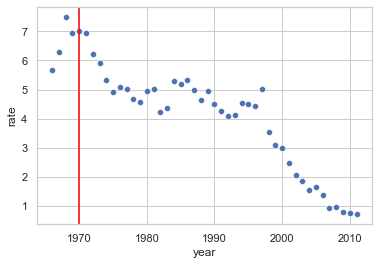

In [14]:
polio["rate"] = np.sqrt((polio["count"]/polio["population"]) * 100000 * (52 / polio["weeks_reporting"]))
groups_state = polio.groupby("state")
California = groups_state.get_group("California")

sns.set_theme(style="whitegrid")
sns.scatterplot(x="year", y="rate", data=California)
plt.axvline(1970, 0,1, color ='red')

In [5]:
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import ttest_rel
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro

In [6]:
groups_year = polio.groupby("year")
average_rates = groups_year["rate"].mean()
print(f"length : {len(groups_year)}")
print(average_rates.index[29])

length : 46
1995


In [15]:
print("---variance---")
print(f"after vacc{average_rates.var()}")


---variance---
after vacc1.7984697925086361


In [16]:
print('---normal distribution')
stat_shap1, p_shap1 = shapiro(average_rates[0:5])
print('stat=%.3f, p=%.3f' % (stat_shap1, p_shap1))
if p_shap1 > 0.05:
	print('before vaccine probably Gaussian')
else:
	print('before vaccine probably not Gaussian')

---normal distribution
stat=0.993, p=0.989
before vaccine probably Gaussian


In [17]:

#looking at the values few years after 1955
stat_shap2, p_shap2 = shapiro(average_rates[5:])
print('stat=%.3f, p=%.3f' % (stat_shap2, p_shap2))
if p_shap2 > 0.05:
	print('from 1955 after vaccine probably Gaussian')
else:
	print('from 1955 after vaccine probably not Gaussian')

stat=0.955, p=0.103
from 1955 after vaccine probably Gaussian


In [10]:
#looking at all the values
stat_shap2, p_shap2 = shapiro(average_rates)
print('stat=%.3f, p=%.3f' % (stat_shap2, p_shap2))
if p_shap2 > 0.05:
	print('complete set probably Gaussian')
else:
	print('complete set probably not Gaussian')

stat=0.958, p=0.092
complete set probably Gaussian


In [11]:
print("---Stationary--")
stat, p, lags, obs, crit, t = adfuller(average_rates)
print('stat=%.3f, p=%.3f' % (stat, p))
print(f'lags:{lags}, obs:{obs}, crit:{crit}, t:{t}')
if p > 0.05:
	print('probably not Stationary')
else:
	print('probably Stationary')

---Stationary--
stat=-1.058, p=0.732
lags:5, obs:40, crit:{'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}, t:-23.60606036960354
probably not Stationary


<AxesSubplot:xlabel='year'>

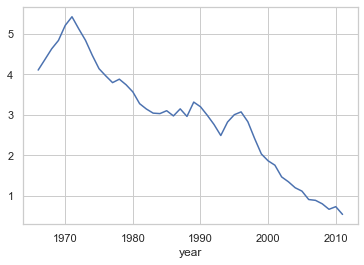

In [12]:
#average per year in USA
groups_year.rate.mean().plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

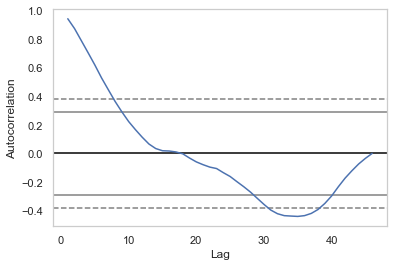

In [13]:
from pandas.plotting import autocorrelation_plot
fig,ax=plt.subplots()
#visibile increasing trend up to values of 27 index which is aroun 1955
autocorrelation_plot(groups_year.rate.mean(), ax=ax)
#no increasing trend after and reversal to the decreasing one 